<a href="https://colab.research.google.com/github/CastHash532/flaml-automol/blob/main/Notebooks/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2020-2021 Microsoft Corporation. All rights reserved. 

Licensed under the MIT License.

AutoML with FLAML Library


## Introduction

FLAML is a Python library (https://github.com/microsoft/FLAML) designed to automatically produce accurate machine learning models 
with low computational cost. It is fast and cheap. The simple and lightweight design makes it easy 
to use and extend, such as adding new learners. FLAML can 
- serve as an economical AutoML engine,
- be used as a fast hyperparameter tuning tool, or 
- be embedded in self-tuning software that requires low latency & resource in repetitive
   tuning tasks.

In this notebook, we use one real data example (binary classification) to showcase how to use FLAML library.

FLAML requires `Python>=3.6`. To run this notebook example, please install flaml with the `notebook` option:
```bash
pip install flaml[notebook]
```

In [ ]:
!pip install flaml[notebook];

## Authenticating with Kaggle using kaggle.json

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below to upload kaggle.json to your Colab runtime.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


## 2. Classification Example
### Load data and preprocess



In [ ]:
!kaggle datasets download -d oddrationale/mnist-in-csv

mnist-in-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip mnist-in-csv

Archive:  mnist-in-csv.zip
replace mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_test.csv          
replace mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yA
  inflating: mnist_train.csv         


In [ ]:
import pandas as pd
import numpy as np

ds_train = pd.read_csv('mnist_train.csv')
ds_test = pd.read_csv('mnist_test.csv')

In [ ]:
X_train = ds_train.drop('label', axis=1)
y_train = ds_train['label']
X_test = ds_test.drop('label', axis=1)
y_test = ds_test['label']

### Run FLAML
In the FLAML automl run configuration, users can specify the task type, time budget, error metric, learner list, whether to subsample, resampling strategy type, and so on. All these arguments have default values which will be used if users do not provide them. For example, the default ML learners of FLAML are `['lgbm', 'xgboost', 'catboost', 'rf', 'extra_tree', 'lrl1']`. 

In [ ]:
''' import AutoML class from flaml package '''
from flaml import AutoML
automl = AutoML()

In [ ]:
settings = {
    "time_budget": 120,  # total running time in seconds
    "metric": 'accuracy',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'classification',  # task type    
    "log_file_name": 'airlines_experiment.log',  # flaml log file
    "seed": 7654321,    # random seed
}

In [ ]:
'''The main flaml automl API'''
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 09-18 21:57:12] {1427} INFO - Evaluation method: holdout
[flaml.automl: 09-18 21:57:13] {1473} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 09-18 21:57:13] {1505} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'lrl1']
[flaml.automl: 09-18 21:57:13] {1735} INFO - iteration 0, current learner lgbm
[flaml.automl: 09-18 21:57:15] {1920} INFO -  at 49.6s,	best lgbm's error=0.2370,	best lgbm's error=0.2370
[flaml.automl: 09-18 21:57:15] {1735} INFO - iteration 1, current learner lgbm
[flaml.automl: 09-18 21:57:17] {1920} INFO -  at 51.5s,	best lgbm's error=0.2370,	best lgbm's error=0.2370
[flaml.automl: 09-18 21:57:17] {1735} INFO - iteration 2, current learner lgbm
[flaml.automl: 09-18 21:57:19] {1920} INFO -  at 53.0s,	best lgbm's error=0.2218,	best lgbm's error=0.2218
[flaml.automl: 09-18 21:57:19] {1735} INFO - iteration 3, current learner xgboost
[flaml.automl: 09-18 21:57:25] {1920} INFO -  at 59.3s,	best xgboos

### Best model and metric

In [ ]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 36, 'num_leaves': 20, 'min_child_samples': 13, 'learning_rate': 0.2882453730811091, 'log_max_bin': 10, 'colsample_bytree': 0.9038613725964871, 'reg_alpha': 0.004919965439995103, 'reg_lambda': 8.625111324002386, 'FLAML_sample_size': 10000}
Best accuracy on validation data: 0.8835
Training duration of best run: 3.014 s


In [ ]:
automl.model.estimator

LGBMClassifier(colsample_bytree=0.9038613725964871,
               learning_rate=0.2882453730811091, max_bin=512,
               min_child_samples=13, n_estimators=4, num_leaves=20,
               objective='multiclass', reg_alpha=0.004919965439995103,
               reg_lambda=8.625111324002386, verbose=-1)

In [ ]:
''' pickle and save the automl object '''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
''' compute predictions of testing dataset ''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels [7 6 1 ... 4 5 6]
True labels 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64


In [ ]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))


accuracy = 0.8975


See Section 4 for an accuracy comparison with default LightGBM and XGBoost.

### Log history

In [ ]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 10000, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0, 'FLAML_sample_size': 10000}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0, 'FLAML_sample_size': 10000}}
{'Current Learner': 'lgbm', 'Current Sample': 10000, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.001348364934537134, 'reg_lambda': 1.4442580148221913, 'FLAML_sample_size': 10000}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, '

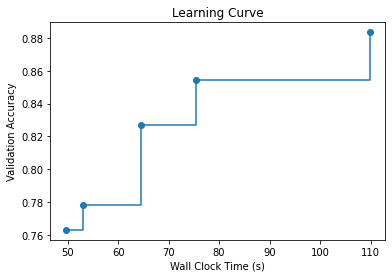

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()